In [1]:
# Dependencies
import json
import requests
import random
import pandas as pd
import numpy as np
import time
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
a = np.arange(lat['min'], lat['max'], 0.01)
b = np.arange(lng['min'], lng['max'], 0.01)

In [3]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
df = pd.DataFrame(columns = column_names)
df

,city_name,country_code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [18]:

# Set the sample size.
sample_size = 500
api_key = "52b08186b5f07264d10013cc7e0bbead"
target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0

# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(df) < sample_size:
    # Choose a random point within our lat-lng domain.
    c = random.choice(a)
    d = random.choice(b)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(c, d)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    file = weather_response.json()
    if file["cod"] == 200:
        print('City: %s. %s' % (file['name'], url))
        latitude = file["coord"]["lat"]
        longitude = file["coord"]["lon"]
        temp = file["main"]["temp"]
        humidity = file["main"]["humidity"]
        cloud = file["clouds"]["all"]
        wind = file["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in df.city_name.values:
            # Append data to df columns
            df.set_value(record, "city_name", city_name)
            df.set_value(record, "country_code", country_code)
            df.set_value(record, "rand_lat", c)
            df.set_value(record, "rand_lng", d)
            df.set_value(record, "Latitude", latitude)
            df.set_value(record, "Longitude", longitude)
            df.set_value(record, "Temp (F)", temp)
            df.set_value(record, "Humidity (%)", humidity)
            df.set_value(record, "Cloudiness (%)", cloud)
            df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Complete\n"
"------------------------------\n"
)

# Visualize df
df.head()

#Save df as CSV
df.to_csv("weather.csv")

------------------------------
Complete
------------------------------



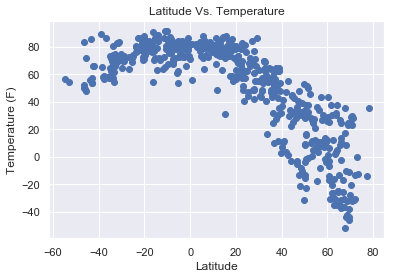

<Figure size 432x288 with 0 Axes>

In [14]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(df["Latitude"],df["Temp (F)"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

# Save the figure
plt.savefig("lat_v_temp.png")

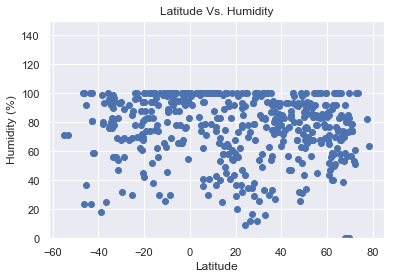

<Figure size 432x288 with 0 Axes>

In [15]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Humidity (%)"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,150)
sns.set()
plt.show()

# Save the figure
plt.savefig("hum_v_lat.png")

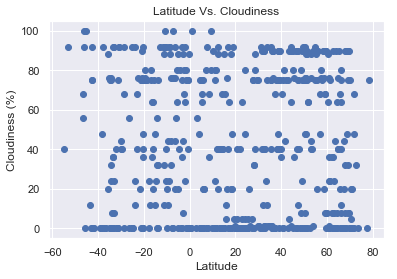

<Figure size 432x288 with 0 Axes>

In [16]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Cloudiness (%)"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

# Save the figure
plt.savefig("cloud_v_lat.png")

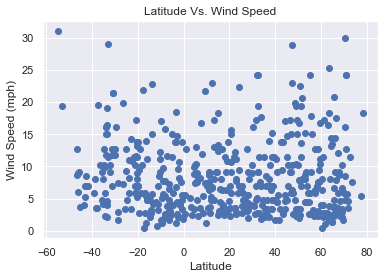

<Figure size 432x288 with 0 Axes>

In [17]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(df["Latitude"],df["Wind Speed (mph)"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()

# Save the figure
plt.savefig("wind_v_lat.png")

In [ ]:
#Observable Trends
#1- Latitutude vs Cloudiness is not linear. It shows scattered points amongst the chart.
#2- Latitude vs Wind is fairly linear. Points on the chart seem to be moving at a constant rate.
#3- Latitude vs Temparture is shown to be inversely related. As one increases the other decreases.